<a href="https://colab.research.google.com/github/MADHUMOYSHAW/Unsupervise-Machine-Learning-projects/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

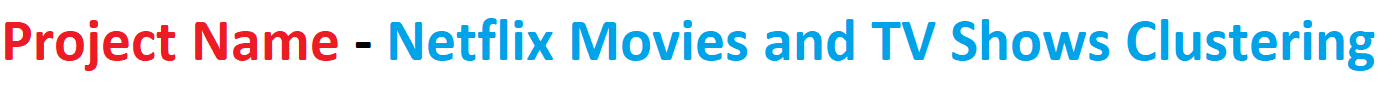

**Project Type** - Unsupervised Machine Learning

**Contribution** - Individual

**Name** - Madhumoy Shaw

# **Project Summary** -

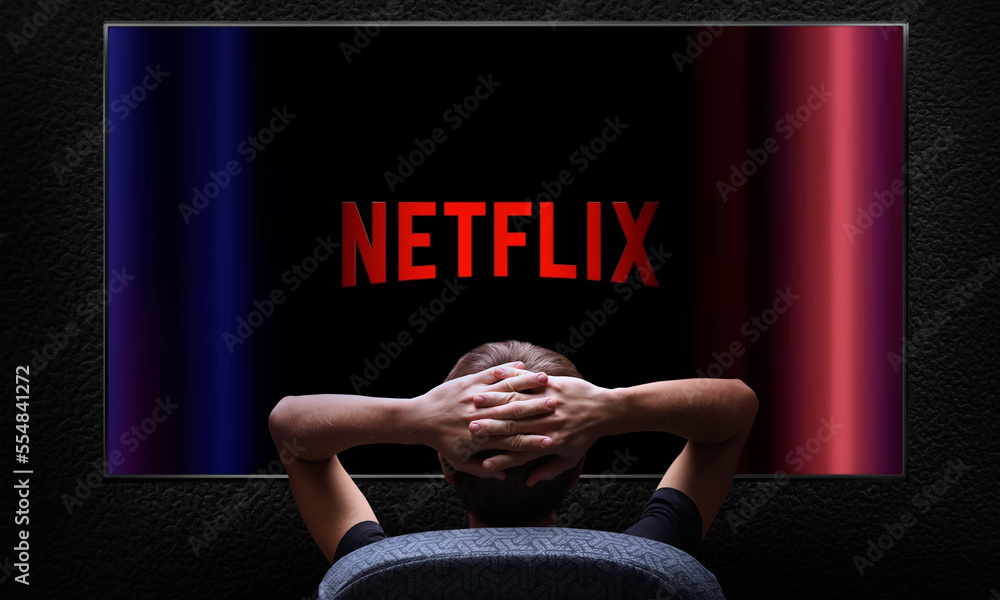

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.




This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Github Link** -

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **AIM**

Our objective is to conduct an Exploratory Data Analysis to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.

# **Dataset Description** -

**1. show_id :** Unique ID for every Movie / Tv Show

**2. type :** Identifier - A Movie or TV Show

**3. title :** Title of the Movie / Tv Show

**4. director :** Director of the Movie

**5. cast :** Actors involved in the movie / show

**6. country :** Country where the movie / show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual Releaseyear of the movie / show

**9. rating :** TV Rating of the movie / show

**10. duration :** Total Duration - in minutes or number of seasons

**11. listed_in :** Genere

**12. description:** The Summary description

#### **Define Your Business Objective?**

1. Exploratory Data Analysis.

2. Understanding what type content is available in different countries.

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features.

# ***Let's Begin !***

First of all, import all required libraries like pandas, matplotlib,Sklearn,Scipy etc. These libraries are used to load, preprocess and visualize the dataset.Then loading data using the read_csv function of the pandas module.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Connect To Google Drive
from google.colab import drive
drive.mount('/content/DRIVE/') # Madhumoy drive connect
#drive.mount('/content/drive/') # Madhumoy drive connect
#drive.mount('/content/Drive/') # Madhumoy drive

Mounted at /content/DRIVE/


### Dataset Loading

In [ ]:
#loading data using exception handling

try:
  # Load Dataset
  file_path= '/content/DRIVE/MyDrive/Colab Notebooks/MACHINE LEARNING/MACHINE LEARNING CHAPTER 10/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' #Madhumoy Shaw
# file_path= '/content/drive/MyDrive/AlmaBetter/CapstoneProject/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.CSV' #AD File path
# file_path='/content/DRIVE/MyDrive/Colab Notebooks/MACHINE LEARNING/MACHINE LEARNING CHAPTER 10/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' #Madhumoy shaw
  df=pd.read_csv(file_path)
except FileNotFoundError:
  print('Please provide correct file path for csv data')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset last View

In [ ]:
# Dataset Last Look
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In that dataset there is no duplicated values are there.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
df.isnull().sum().sum()

3631

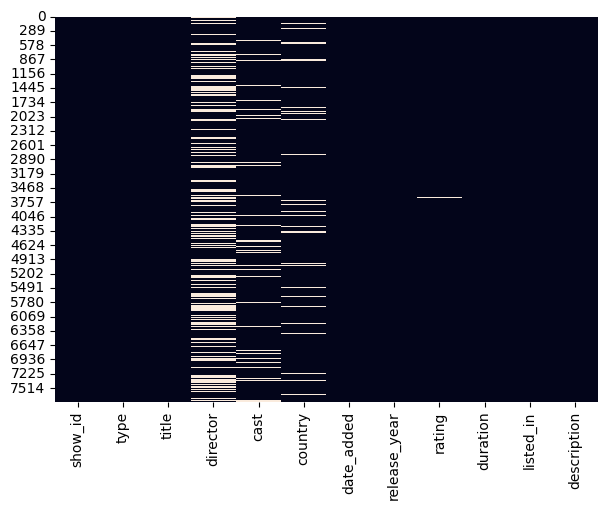

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

In that dataset this column null value there 1. director=2389,cast    =718,country=507,date_added=10 and 7 rating.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


In [ ]:
#total null values
df.isnull().sum().sum()

3631

In [ ]:
df['rating'].mode()[0]

'TV-MA'

In [ ]:
df[['director','cast','country']].fillna('Unknown')

,director,cast,country
0,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil
1,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico
2,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore
3,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States
4,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States
...,...,...,...
7782,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar..."
7783,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India
7784,Unknown,Nasty C,Unknown
7785,Unknown,"Adriano Zumbo, Rachel Khoo",Australia


In [ ]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Dataset Rows & Columns count
df.shape

(7777, 12)

### What all manipulations have you done and insights you found?

# **Feature engineering**

In [ ]:
# Top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [ ]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

Netflix has 5372 movies and 2400 TV shows,
there are more   number movies on Netflix than TV shows.



In [ ]:
df.rating.value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
# Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added,month_added,year_added,target_ages,principal_country,count
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,2020-08-14,8,2020,Adults,Brazil,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016-12-23,12,2016,Adults,Mexico,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018-12-20,12,2018,Adults,Singapore,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017-11-16,11,2017,Teens,United States,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,2020-01-01,1,2020,Teens,United States,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,Adults,1,International TV Shows,A genetics professor experiments with a treatm...,2017-07-01,7,2017,Adults,Turkey,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,Adults,95,Horror Movies,"After an awful accident, a couple admitted to ...",2020-06-01,6,2020,Adults,Egypt,1
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,1997,Adults,119,Dramas,After one of his high school students attacks ...,2019-11-01,11,2019,Adults,United States,1
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019,Adults,118,Horror Movies,"When a doctor goes missing, his psychiatrist w...",2019-04-01,4,2019,Young Adults,India,1
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2008,Adults,143,Horror Movies,An architect and his wife move into a castle t...,2017-12-15,12,2017,Adults,India,1


In [ ]:
# contry in which a movie was produced
df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [ ]:
# genre of shows
df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...


In [ ]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: (x.split()[0]))

In [ ]:
df.type.value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [ ]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [ ]:
# TV Show  length in minutes#
df[df['type']=='TV Show'].duration.unique()

array(['4', '1', '2', '3', '5', '9', '8', '6', '11', '7', '13', '12',
       '10', '16', '15'], dtype=object)

In [ ]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

# Date_added column string to Datetime format

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Typecasting 'date_added' from string to datetime
df['date_added '] = pd.to_datetime(df['date_added'])

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


The code provided is a Python code snippet that converts the 'date_added' column in a pandas DataFrame, df, to datetime format using the pd.to_datetime() function. Here's what the code does:


#***df['date_added']***: This syntax accesses the 'date_added' column in the DataFrame df.


#***pd.to_datetime(...)***: This is a pandas function used to convert a series or array of strings, numbers, or timestamps to datetime objects. In this case, it converts the 'date_added' column to datetime format.


#***errors='coerce'***: The errors parameter is set to 'coerce', which means that if there are any invalid dates or missing values in the 'date_added' column, they will be converted to NaT (Not-a-Time) values.


#***By using pd.to_datetime()*** with the errors='coerce' option, the code converts the 'date_added' column to datetime format, making it easier to perform date-based operations and analyses on the DataFrame. Any invalid or missing date values will be replaced with NaT, indicating that the data was not successfully converted to a valid date format.







In [ ]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The code provided is a Python code snippet that retrieves the first and last dates on which a show was added on Netflix. Here's what the code does:

#***df.date_added.min():*** This line uses the min() function to find the earliest date in the 'date_added' column of the DataFrame df. It returns the minimum date value, which represents the first date on which a show was added to Netflix.

#***df.date_added.max():*** This line uses the max() function to find the latest date in the 'date_added' column of the DataFrame df. It returns the maximum date value, which represents the last date on which a show was added to Netflix.

By using min() and max() functions on the 'date_added' column, the code efficiently retrieves the first and last dates in the column, allowing you to determine the time range during which shows were added to the Netflix platform.

In [ ]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Dataset Rows & Columns count
df.shape

(7777, 14)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   int64         
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
 11  date_added    7777 non-null   datetime64[ns]
 12  month_added   7777 non-null   int64         
 13  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 911.4+ KB


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Chart-1**

In [ ]:
df.type

0       TV Show
1         Movie
2         Movie
3         Movie
4         Movie
         ...   
7782      Movie
7783      Movie
7784      Movie
7785    TV Show
7786      Movie
Name: type, Length: 7777, dtype: object

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

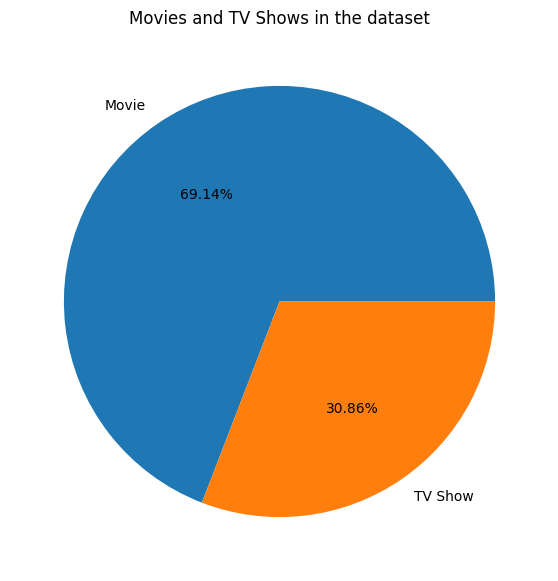

In [ ]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

i. A pie chart, sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable



ii. In this pie plot there are more movies 69.14% than TV shows 30.86% in the dataset.

##### ***1. Why did you pick the specific chart?***

To see the relatiooship between movies and TV Show.


#####***2. What is/are the insight(s) found from the chart?***


The code provided is a Python code snippet that creates a pie chart to visualize the number of movies and TV shows in the dataset. Here's what the code does:


plt.figure(figsize=(7, 7)): This line sets the size of the figure (pie chart) to have a width and height of 7 inches each.


df.type.value_counts(): This line calculates the count of each unique value in the 'type' column of the DataFrame df. In this case, the 'type' column contains information about whether the entry is a "Movie" or a "TV Show."


.plot(kind='pie', autopct='%1.2f%%'): This line plots the data as a pie chart using the plot() function. The kind='pie' parameter specifies that the plot should be a pie chart. The autopct='%1.2f%%' parameter adds percentage labels to each slice of the pie chart, displaying the proportion of movies and TV shows.


plt.ylabel(''): This line removes the ylabel from the pie chart, so it doesn't show any label on the y-axis.


plt.title('Movies and TV Shows in the dataset'): This line adds a title to the pie chart, specifying that it represents the number of movies and TV shows in the dataset.


The resulting pie chart will display two slices, one for movies and one for TV shows, and the size of each slice will represent the proportion of movies and TV shows in the dataset. The percentage labels will indicate the percentage of movies and TV shows relative to the total


##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

In [ ]:
df[~(df['director']=='Unknown')].director.value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In summary, the code counts the occurrences of each director's name in the DataFrame 'df', excluding the rows where the director is listed as 'Unknown'.

# **Chart-2**

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

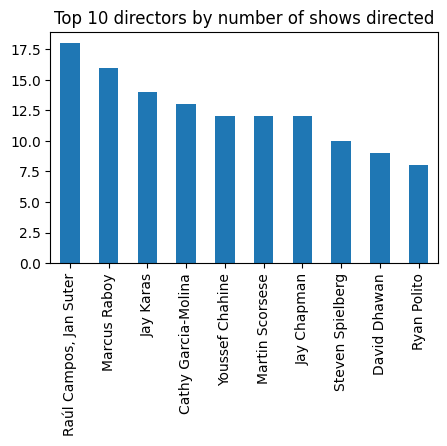

In [ ]:
# Top 10 directors in the dataset
plt.figure(figsize=(5,3))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 directors by number of shows directed')

i. A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

**ii. In this Bar plot there are showing Top 10 directors by number of shows directed.**

1.Raul Campos jan Suter are the top 1 director.

2.Rayan Polito are top 10 director


##### ***1. Why did you pick the specific chart?***


The resulting bar chart will display the top 10 directors with the highest number of shows directed, allowing you to easily compare the number of shows directed by each director.




#####***2. What is/are the insight(s) found from the chart?***


The code provided is a Python code snippet that creates a bar chart to visualize the top 10 directors in the dataset based on the number of shows they have directed. Here's what the code does:



plt.figure(figsize=(10, 5)):  This line sets the size of the figure (bar chart) to have a width of 10 inches and a height of 5 inches.


df[~(df['director']=='Unknown')]:  This line filters the DataFrame df to exclude rows where the 'director' is labeled as 'Unknown'. This ensures that only rows with known directors are considered for the analysis.


director.value_counts():  This line calculates the count of occurrences of each unique director in the filtered DataFrame. It counts the number of shows directed by each director.


.nlargest(10):  This line selects the top 10 directors with the highest number of shows directed. It retains only the rows corresponding to these top 10 directors.


.plot(kind='bar'): This line creates the bar chart using the plot() function. The kind='bar' parameter specifies that the plot should be a bar chart.

plt.title('Top 10 directors by number of shows directed'): This line adds a title to the bar chart, specifying that it represents the top 10 directors based on the number of shows they have directed.

The resulting bar chart will display the top 10 directors with the highest number of shows directed, allowing you to easily compare the number of shows directed by each director.




##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

# **Chart-3**

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

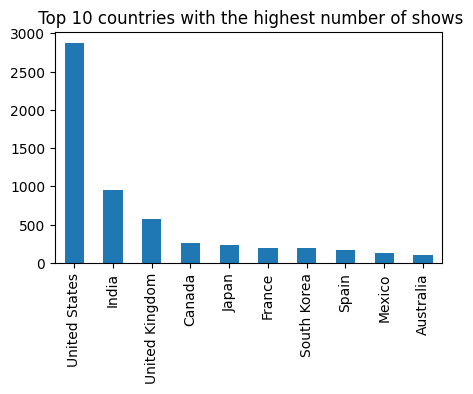

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(5,3))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='bar')
plt.title(' Top 10 countries with the highest number of shows')

 A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

** In that bar graph showing Top 10 countries with the highest number movies / TV shows in the dataset.**

1.united States are the top one country of highest number movies / TV shows in the dataset.

2.Australia are the top 10 highest number movies / TV shows in the dataset

##### ***1. Why did you pick the specific chart?***

The resulting bar chart will display the top 10 countries with the highest number of movies/TV shows, allowing you to easily compare the number of shows originating from each country.





#####***2. What is/are the insight(s) found from the chart?***


The code provided is a Python code snippet that creates a bar chart to visualize the top 10 countries with the highest number of movies/TV shows in the dataset. Here's what the code does:




plt.figure(figsize=(10, 5)): This line sets the size of the figure (bar chart) to have a width of 10 inches and a height of 5 inches.




df[~(df['country']=='Unknown')]: This line filters the DataFrame df to exclude rows where the 'country' is labeled as 'Unknown'. This ensures that only rows with known countries are considered for the analysis.




country.value_counts(): This line calculates the count of occurrences of each unique country in the filtered DataFrame. It counts the number of movies/TV shows originating from each country.



.nlargest(10): This line selects the top 10 countries with the highest number of movies/TV shows. It retains only the rows corresponding to these top 10 countries.





.plot(kind='bar'): This line creates the bar chart using the plot() function. The kind='bar' parameter specifies that the plot should be a bar chart.





plt.title('Top 10 countries with the highest number of shows'): This line adds a title to the bar chart, specifying that it represents the top 10 countries with the highest number of movies/TV shows.





The resulting bar chart will display the top 10 countries with the highest number of movies/TV shows, allowing you to easily compare the number of shows originating from each country.






##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

In [ ]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [ ]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

# **Chart-4**

Text(0.5, 1.0, 'distribution by released year')

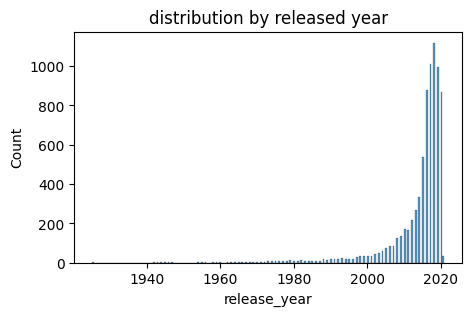

In [ ]:
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(5,3))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

i. In statistics, a histogram is a graphical representation of the distribution of data. The histogram is represented by a set of rectangles, adjacent to each other, where each bar represent a kind of data.

ii. In this histogram we found release_year 2000 to 2020 more the the movie / tv show was released


##### ***1. Why did you pick the specific chart?***

The resulting histogram will display the distribution of movies/TV shows based on the years in which they were released. Each bar in the histogram represents the count of movies/TV shows released in a particular year, allowing you to visualize trends or patterns over time.


#####***2. What is/are the insight(s) found from the chart?***


The code provided is a Python code snippet that creates a histogram to visualize the distribution of movies/TV shows based on their release year in the dataset. Here's what the code does:


plt.figure(figsize=(10, 5)): This line sets the size of the figure (histogram) to have a width of 10 inches and a height of 5 inches.



sns.histplot(df['release_year']): This line uses Seaborn's histplot function to create the histogram. It plots the frequency distribution of the 'release_year' column from the DataFrame df, which represents the years in which movies/TV shows were released.



plt.title('distribution by released year'): This line adds a title to the histogram, specifying that it represents the distribution of movies/TV shows by their release year.





##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

# **Chart-5**

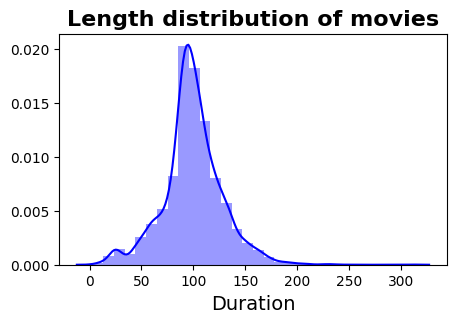

In [ ]:
# Length distribution of movies
movie_df = df[df['type']=='Movie']

plt.figure(figsize=(5, 3))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

in this plot we found the Length distribution of movies duration.we see 0 to 100  duration movies are increases and 100 to 200  duration duration are decreases.

##### ***1. Why did you pick the specific chart?***


The resulting histogram will display the distribution of movie durations, showing the frequency of different movie lengths (durations) based on the 'duration' column from the movie_df DataFrame. The histogram's bars represent the count of movies falling within each duration range, allowing you to visualize the distribution of movie lengths in the dataset.


#####***2. What is/are the insight(s) found from the chart?***


The code provided is a Python code snippet that creates a histogram to visualize the length distribution of movies in the dataset. Here's what the code does:


movie_df = df[df['type']=='Movie']: This line creates a new DataFrame movie_df by filtering the original DataFrame df to include only rows where the 'type' column is labeled as 'Movie'. This ensures that only movie entries are considered for the length distribution analysis.


plt.figure(figsize=(14, 7)): This line sets the size of the figure (histogram) to have a width of 14 inches and a height of 7 inches.


sns.distplot(movie_df['duration'], bins=30, color='Blue'): This line uses Seaborn's distplot function to create the histogram. It plots the distribution of movie durations based on the 'duration' column from the movie_df DataFrame. The bins=30 parameter specifies that the histogram should have 30 bins for grouping the duration values, and color='Blue' sets the color of the histogram bars to blue.


.set(ylabel=None): This line removes the ylabel (y-axis label) from the plot.


plt.title('Length distribution of movies', fontsize=16, fontweight="bold"): This line adds a title to the histogram, specifying that it represents the length distribution of movies. The title is set with a font size of 16 and bold font weight.


plt.xlabel('Duration', fontsize=14): This line adds a label to the x-axis, indicating that it represents the movie duration. The label is set with a font size of 14.


plt.show(): This line displays the histogram.


The resulting histogram will display the distribution of movie durations, showing the frequency of different movie lengths (durations) based on the 'duration' column from the movie_df DataFrame. The histogram's bars represent the count of movies falling within each duration range, allowing you to visualize the distribution of movie lengths in the dataset.




##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

# **Chart-6**

<Axes: xlabel='rating', ylabel='count'>

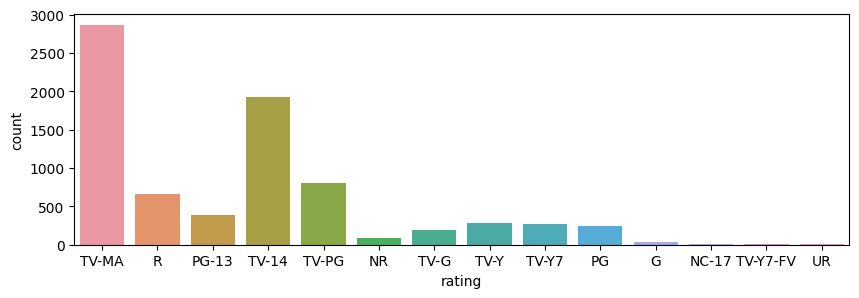

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,3))
sns.countplot(x='rating',data=df)

i. countplot() method is used to Show the counts of observations in each categorical bin using bars.

ii. in this plot we found all rating count. TV-MA is the highest rating and second highest is TV-14 and third highest is TV-PG rating.

##### ***1. Why did you pick the specific chart?***


The resulting count plot will display the distribution of shows based on their age ratings. Each bar in the plot represents the count of shows with a specific age rating, allowing you to visualize how the shows are distributed across different age categories or ratings in the dataset.

#####***2. What is/are the insight(s) found from the chart?***


The code provided is a Python code snippet that creates a count plot to visualize the age ratings for shows in the dataset. Here's what the code does:


plt.figure(figsize=(10, 5)): This line sets the size of the figure (count plot) to have a width of 10 inches and a height of 5 inches.


sns.countplot(x='rating', data=df): This line uses Seaborn's countplot function to create the count plot. It plots the count of shows in the DataFrame df based on the 'rating' column. The 'rating' column represents the age ratings assigned to the shows, indicating the appropriate audience for each show.


The x='rating' parameter specifies that the 'rating' column should be used for the x-axis of the count plot.

##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

In [ ]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
df['target_ages'] = df['rating'].replace(rating_map)

In [ ]:
# type should be a category
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'])

In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

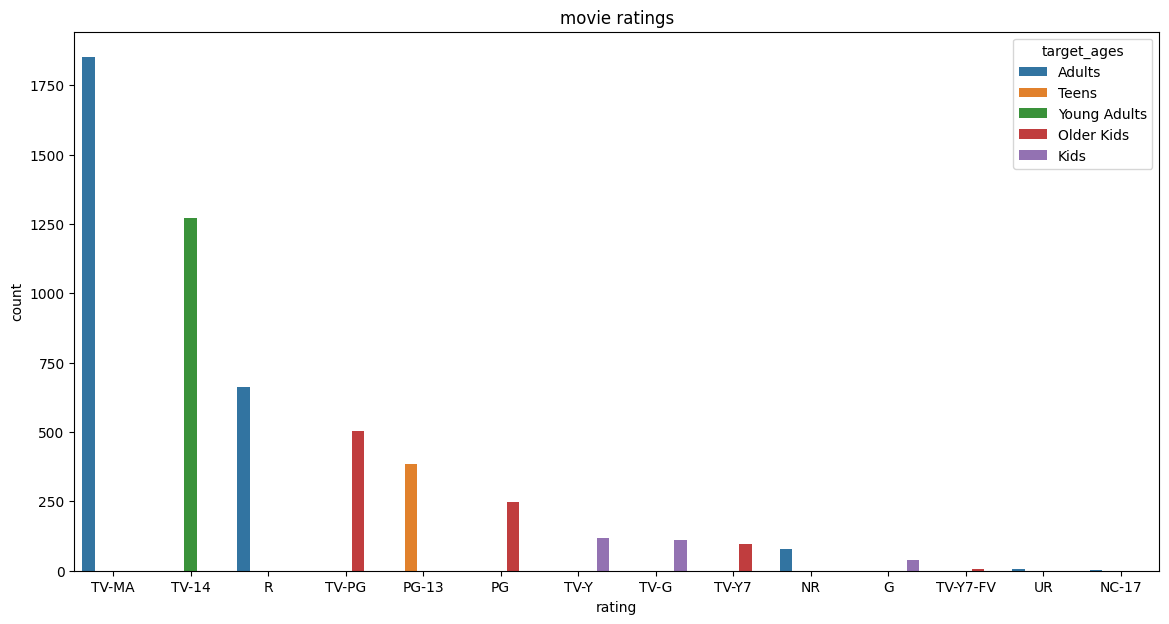

In [ ]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,7))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)

#***order=movies['rating'].value_counts().index:*** This part of the code determines the order in which the 'rating' categories will be displayed on the x-axis. It appears that it's ordering the ratings based on their counts in descending order (from most common to least common).


The sns.countplot() function from seaborn creates a bar plot showing the count of movies for each rating, with different colors representing the target age groups. This plot provides a visual representation of how movie ratings are distributed among different target age groups.

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added,month_added,year_added,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,2020-08-14,8,2020,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016-12-23,12,2016,Adults


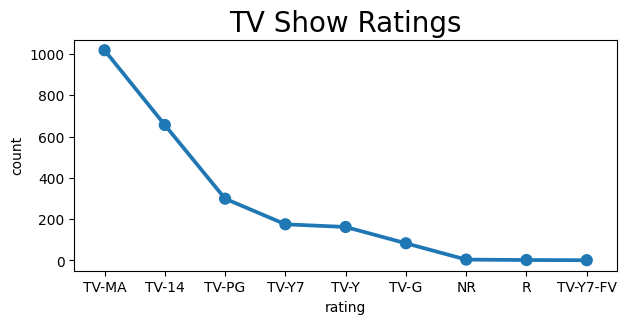

In [ ]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (7,3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

#***sns.pointplot(x='rating', y='count', data=tv_ratings):*** This line creates the point plot using the seaborn library. It uses the 'rating' column as the x-axis and the 'count' column as the y-axis, both taken from the 'tv_ratings' DataFrame. The point plot represents the count of TV shows for each rating category.

The code will generate a point plot with 'rating' categories on the x-axis and the count of TV shows for each rating category on the y-axis. The point plot will provide a visual representation of how TV shows are distributed across different rating categories.

In [ ]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added,month_added,year_added,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,2020-08-14,8,2020,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016-12-23,12,2016,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018-12-20,12,2018,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017-11-16,11,2017,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,2020-01-01,1,2020,Teens


In [ ]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

country_order = df['principal_country'].value_counts()[:11].index
content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [ ]:
content_data_ratio

type,Movie,TV Show
South Korea,0.216495,0.783505
Japan,0.317797,0.682203
Unknown,0.454545,0.545455
Australia,0.523364,0.476636
United Kingdom,0.592014,0.407986
Mexico,0.642276,0.357724
Canada,0.675676,0.324324
France,0.698980,0.301020
Spain,0.708333,0.291667
United States,0.729927,0.270073


In [ ]:
content_data

type,Movie,TV Show,sum
United States,2100,777,2877
India,883,73,956
United Kingdom,341,235,576
Unknown,230,276,506
Canada,175,84,259
Japan,75,161,236
France,137,59,196
South Korea,42,152,194
Spain,119,49,168
Mexico,79,44,123


In [ ]:
df.principal_country.value_counts().index

Index(['United States', 'India', 'United Kingdom', 'Unknown', 'Canada',
       'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia',
       'Turkey', 'Egypt', 'Germany', 'China', 'Taiwan', 'Brazil', 'Hong Kong',
       'Indonesia', 'Philippines', 'Nigeria', 'Argentina', 'Thailand', 'Italy',
       'Colombia', 'South Africa', 'Denmark', 'Singapore', 'Ireland', 'Poland',
       'Netherlands', 'Malaysia', 'Pakistan', 'Chile', 'Norway', 'Lebanon',
       'Russia', 'Israel', 'United Arab Emirates', 'Sweden', 'New Zealand',
       'Belgium', 'Romania', 'Saudi Arabia', 'Uruguay', 'Austria',
       'Switzerland', 'Finland', 'Peru', 'Kuwait', 'Iceland', 'Vietnam',
       'Czech Republic', 'Bulgaria', 'Ghana', 'Hungary', 'Serbia', 'Kenya',
       'Georgia', 'Bangladesh', 'Croatia', 'Ukraine', 'Venezuela', 'Cambodia',
       'Portugal', 'Jamaica', 'Paraguay', 'Belarus', 'Cyprus', 'Greece',
       'Senegal', 'Guatemala', 'Mauritius', 'Puerto Rico', 'Jordan',
       'Slovenia', 'West Ge

content_data = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]: This line groups the DataFrame df by 'principal_country' and 'type' (Movie or TV Show) to calculate the count of each content type (Movie or TV Show) for each principal country. The unstack() function transforms the grouped data into a tabular format, and loc[country_order] filters the data to include only the top 11 principal countries.

In [ ]:
df['principal_country'].value_counts()[:11].index

Index(['United States', 'India', 'United Kingdom', 'Unknown', 'Canada',
       'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'],
      dtype='object')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added,month_added,year_added,target_ages,principal_country
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,2020-08-14,8,2020,Adults,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016-12-23,12,2016,Adults,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018-12-20,12,2018,Adults,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017-11-16,11,2017,Teens,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020-01-01,1,2020,Teens,United States


In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
target_ages,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051,0.320158
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.098366,0.005929
Young Adults,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.141814,0.268775
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038,0.235178
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731,0.169960


#***df['count'] = 1:*** This line adds a new column named 'count' to the 'df' DataFrame and sets all its values to 1. This column is likely being added to keep track of the counts for each 'principal_country' and will be used later for aggregation.

#***Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'], normalize="index").T:*** This line uses the pd.crosstab() function to create a cross-tabulation between the 'principal_country' and 'rating' columns in the Flix_df_heatmap DataFrame. The resulting DataFrame represents the count of each rating for each of the top 10 principal countries. The normalize="index" parameter normalizes the counts by row (for each country) to get the proportion of each rating for that country. The .T transposes the cross-tabulation to have countries as rows and ratings as columns.

The final result is the Flix_df_heatmap DataFrame, which contains the normalized counts of ratings for the top 10 principal countries in the dataset. This DataFrame can be used to create a heatmap to visualize the distribution of ratings across these countries.

In [ ]:
df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data

,principal_country,count
0,United States,2877
1,India,956
2,United Kingdom,576
3,Unknown,506
4,Canada,259
5,Japan,236
6,France,196
7,South Korea,194
8,Spain,168
9,Mexico,123


In [ ]:
df['count'] = 1
data = df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']
data

0     United States
1             India
2    United Kingdom
3           Unknown
4            Canada
5             Japan
6            France
7       South Korea
8             Spain
9            Mexico
Name: principal_country, dtype: object

# **Chart-7**

# **Correlation Heatmap**

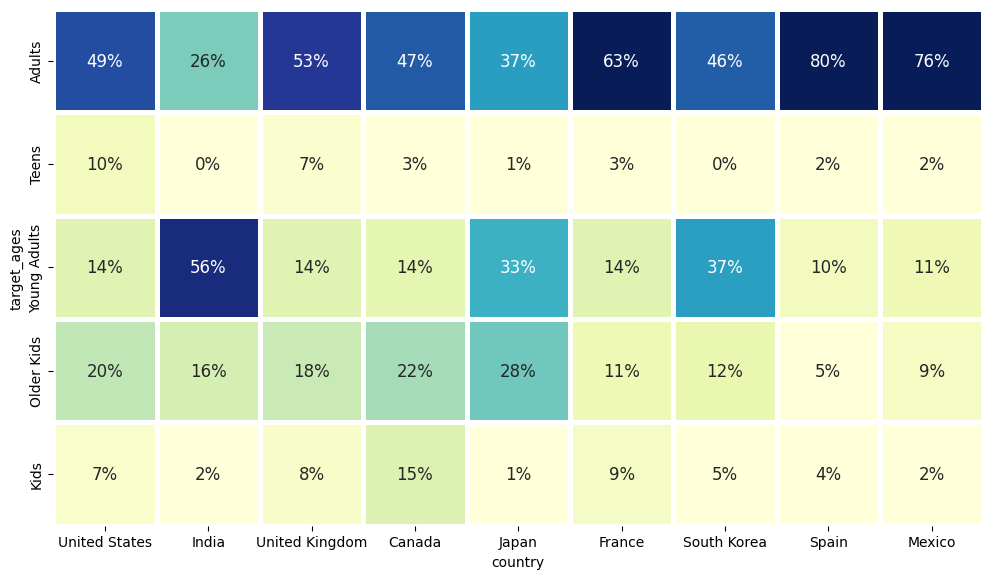

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

i. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

ii. Thus to know the correlation between all the variables along with the correlation coefficients, i used correlation heatmap.

iii. In this correlation Heatmap graph we found the Target ages proportion of total content by country.

##### ***1. Why did you pick the specific chart?***


The resulting heatmap will display the normalized proportion of each 'rating' category within each of the selected top countries and for the specified age groups. The color intensity in each cell represents the proportion, and the values inside the cells show the percentages. The rows (age groups) and columns (countries) will be in the order defined by 'age_order' and 'country_order2', respectively.

#####***2. What is/are the insight(s) found from the chart?***


The code provided is a Python code snippet that creates a count plot to visualize the age ratings for shows in the dataset. Here's what the code does:


The provided code uses the seaborn library to create a heatmap plot based on the 'df_heatmap' DataFrame. Let's break down the code:


fig, ax = plt.subplots(1, 1, figsize=(12, 12)): This line creates a figure and axes object for the heatmap plot. The figure size is set to 12 inches wide and 12 inches high.


country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']: This line defines the order of the countries to be displayed on the heatmap. The order is

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']: This line defines the order of the age groups to be displayed on the heatmap. The order is specified as a list of age group names.

sns.heatmap(df_heatmap.loc[age_order, country_order2], cmap="YlGnBu", square=True, linewidth=2.5, cbar=False, annot=True, fmt='1.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize":12}): This line creates the heatmap plot using the seaborn library.


df_heatmap.loc[age_order, country_order2]: This part of the code selects the subset of the 'df_heatmap' DataFrame by indexing it with the 'age_order' list for rows (age groups) and 'country_order2' list for columns (countries). This is done to display the heatmap only for the selected age groups and countries in the specified order.


cmap="YlGnBu": This sets the color map for the heatmap to 'YlGnBu', which is a color map ranging from yellow to green to blue.


square=True: This parameter ensures that the heatmap cells are square-shaped.

linewidth=2.5: This sets the width of the lines that separate the cells of the heatmap.

cbar=False: This parameter disables the color bar on the side of the heatmap.


annot=True: This displays the numeric values inside each cell of the heatmap.

fmt='1.0%': This specifies the format of the values inside each cell. '1.0%' means the values will be displayed as percentages with no decimal places.


vmax=.6: This sets the maximum value for the color scale. Values above 0.6 will have the same color.


vmin=0.05: This sets the minimum value for the color scale. Values below 0.05 will have the same color.

ax=ax: This specifies the axes object where the heatmap should be plotted.


annot_kws={"fontsize":12}: This sets the font size for the annotations inside the cells of the heatmap to 12.


plt.show(): This line displays the heatmap plot on the screen.


##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

# **Chart-8**

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

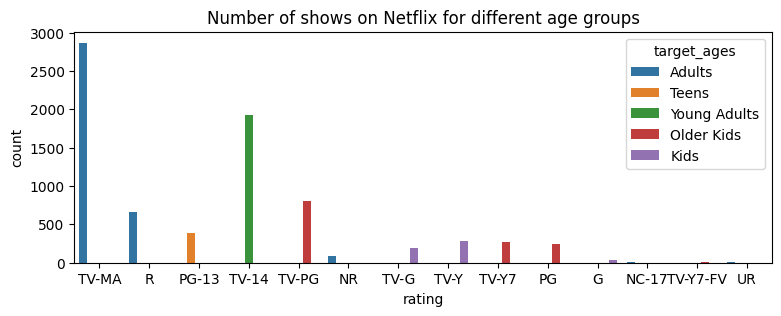

In [ ]:
# Age ratings for shows in the dataset
plt.figure(figsize=(9,3))
sns.countplot(x='rating',hue = 'target_ages' ,data=df)
plt.title('Number of shows on Netflix for different age groups')

i. i. countplot() method is used to Show the counts of observations in each categorical bin using bars.

ii. In this count plot we found that Number of shows on Netflix for different age groups and Adults are the highest number of shows and second highest is Young Adults and third highest is older Kids shows.

##### ***1. Why did you pick the specific chart?***

The resulting count plot will help to understand how the shows on Netflix are distributed among different age groups for each rating category. It provides a quick overview of the number of shows available for children, teens, and adults, for example, within each rating level.

#####***2. What is/are the insight(s) found from the chart?***


The code provided is a Python code snippet that creates a count plot to visualize the age ratings for shows in the dataset. Here's what the code does:


plt.figure(figsize=(9, 3)): This line sets the size of the figure that will be created for the count plot. The figure size is 9 inches wide and 3 inches high.


sns.countplot(x='rating', hue='target_ages', data=df): This line creates the count plot using the seaborn library.


x='rating': This specifies that the 'rating' column from the DataFrame 'df' will be used for the x-axis of the count plot. The 'rating' column likely contains categorical data representing different movie/TV show ratings (e.g., G, PG, PG-13, R, etc.).


hue='target_ages': This specifies that the 'target_ages' column from the DataFrame 'df' will be used to group and distinguish the data. The 'target_ages' column probably contains the target age groups for each show (e.g., children, teens, adults, etc.). The 'hue' parameter allows us to differentiate the bars on the count plot based on this grouping.


data=df: This specifies the DataFrame 'df' from which the data will be drawn for creating the plot.


The count plot will have bars for each 'rating' category, and each bar will be divided based on the 'target_ages' group. This will provide a visual representation of the number of shows on Netflix in different age groups for each rating category.


plt.title('Number of shows on Netflix for different age groups'): This line sets the title of the plot as "Number of shows on Netflix for different age groups."


plt.show(): This line displays the count plot on the screen..


##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

# **Chart-9**

# **Genres**

In [ ]:
movies

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added,month_added,year_added,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016-12-23,12,2016,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018-12-20,12,2018,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017-11-16,11,2017,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020-01-01,1,2020,Teens
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,95,Horror Movies,"After an awful accident, a couple admitted to ...",2020-06-01,6,2020,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020-01-11,1,2020,Older Kids
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2005,TV-MA,99,Dramas,When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,10,2020,Adults
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,2019-03-02,3,2019,Young Adults
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,TV-MA,44,Documentaries,"In this documentary, South African rapper Nast...",2020-09-25,9,2020,Adults


In [ ]:
tv_shows

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added,month_added,year_added,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,2020-08-14,8,2020,Adults
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1,International TV Shows,A genetics professor experiments with a treatm...,2017-07-01,7,2017,Adults
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...",Poland,2018,TV-MA,1,Crime TV Shows,"In this dark alt-history thriller, a naïve law...",2018-11-30,11,2018,Adults
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019,TV-MA,1,Crime TV Shows,Archival video and new interviews examine Mexi...,2019-05-17,5,2019,Adults
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,2018,TV-14,1,International TV Shows,"As a psychology professor faces Alzheimer's, h...",2019-03-20,3,2019,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2012,TV-PG,1,International TV Shows,"Strong-willed, middle-class Kashaf and carefre...",2016-12-15,12,2016,Older Kids
7775,s7776,TV Show,Zoids Wild,Unknown,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2018,TV-Y7,1,Anime Series,A quest for freedom and legendary treasure beg...,2020-08-14,8,2020,Older Kids
7777,s7778,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,TV-Y7,2,Kids' TV,"While living alone in a spooky town, a young g...",2019-07-01,7,2019,Older Kids
7779,s7780,TV Show,Zona Rosa,Unknown,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019,TV-MA,1,International TV Shows,An assortment of talent takes the stage for a ...,2019-11-26,11,2019,Adults


<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

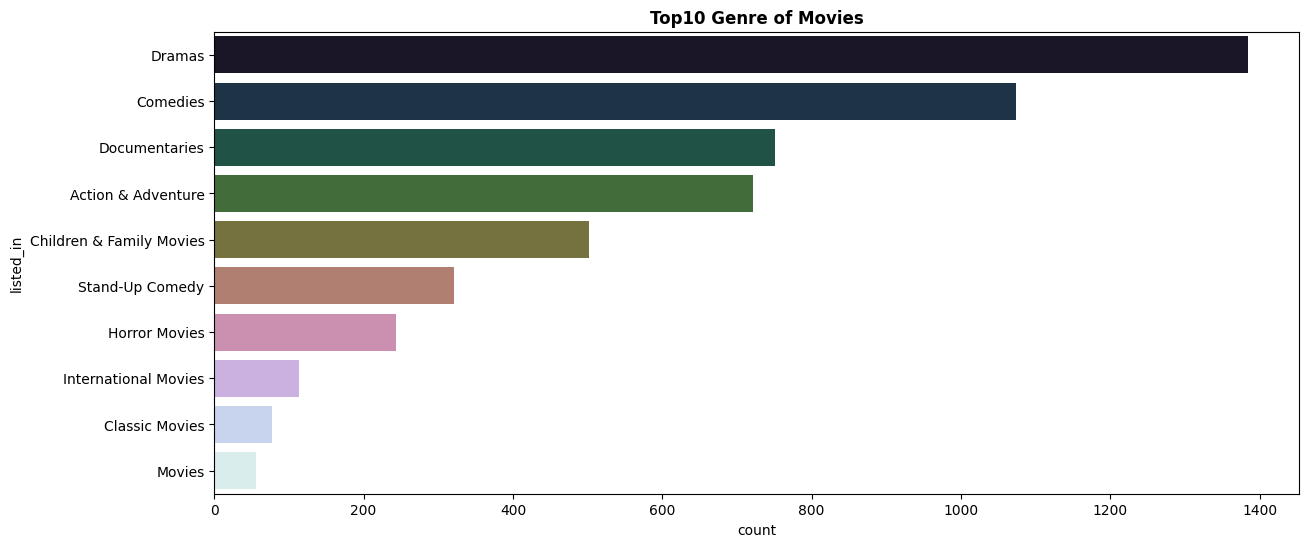

In [ ]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],palette="cubehelix")

i. A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle. The length and heights of the bar chart represent the data distributed in the dataset. In a bar chart, we have one axis representing a particular category of a column in the dataset and another axis representing the values or counts associated with it.  Bar charts can be plotted vertically or horizontally. A vertical bar chart is often called a column chart.

ii. In this  bar plot we found Dramas are large value_counts of shows and movies and Comedies are the second large value_counts of shows and Movies.

##### ***1. Why did you pick the specific chart?***

The count plot will have bars for each genre, and the genres will be displayed on the y-axis. The bars will be sorted in descending order based on their occurrence counts. This plot provides a visual representation of the top 10 genres of movies in the 'movies' DataFrame, showing which genres are the most prevalent.

#####***2. What is/are the insight(s) found from the chart?***


The provided code uses the seaborn library to create a count plot that shows the top 10 genres of movies based on the 'listed_in' column in the 'movies' DataFrame. Let's break down the code:


plt.figure(figsize=(14, 6)): This line sets the size of the figure that will be created for the count plot. The figure size is 14 inches wide and 6 inches high.


plt.title('Top10 Genre of Movies', fontweight="bold"): This line sets the title of the plot as "Top10 Genre of Movies" with bold font weight.


sns.countplot(y=movies['listed_in'], data=movies, order=movies['listed_in'].value_counts().index[0:10], palette="cubehelix"): This line creates the count plot using the seaborn library.


y=movies['listed_in']: This specifies that the 'listed_in' column from the 'movies' DataFrame will be used for the y-axis of the count plot. The 'listed_in' column likely contains categorical data representing different genres in which movies are listed.


data=movies: This specifies the DataFrame 'movies' from which the data will be drawn for creating the plot.


order=movies['listed_in'].value_counts().index[0:10]: This part of the code determines the order in which the genres will be displayed on the y-axis. It is using value_counts() to count the occurrences of each genre, and then index[0:10] selects the top 10 genres based on their counts in descending order (from most common to least common). This way, the plot will display the top 10 genres.


palette="cubehelix": This sets the color palette for the bars in the count plot. The "cubehelix" palette provides a smooth transition of colors and enhances the visual appeal of the plot.



##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

<Axes: title={'center': 'Top10 Genre of tv_shows'}, xlabel='count', ylabel='listed_in'>

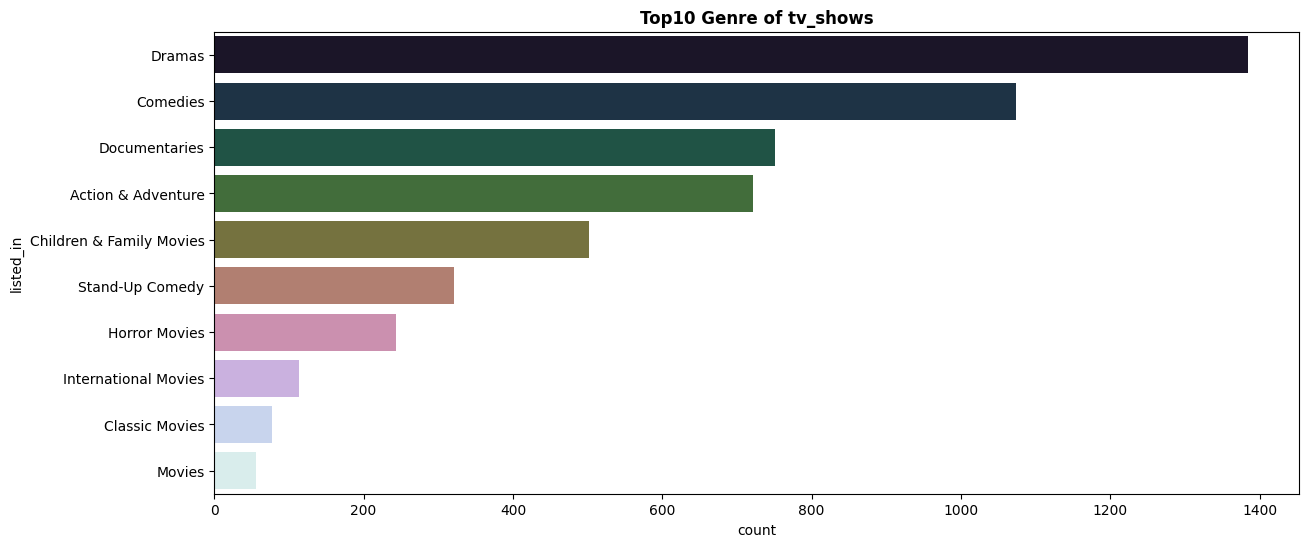

In [ ]:
#Analysing top10 genre of the tv_shows:
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of tv_shows',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=tv_shows,order=movies['listed_in'].value_counts().index[0:10],palette="cubehelix")

In [ ]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [ ]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

# **Chart-10**

Text(0.5, 0, '')

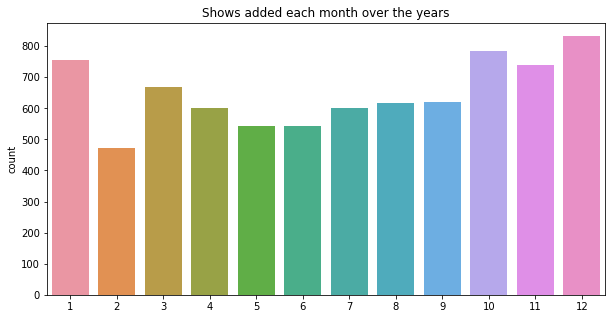

In [ ]:
# Number of shows added on different months
plt.figure(figsize = (10,5))
sns.countplot(df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('')

i. in this count plot we found Number of shows added on different months.

ii. December are the highest number of shows added on and Octobor are the second highest number of shows added on. we see all month minority difference between them.

##### ***1. Why did you pick the specific chart?***

The count plot will have bars for each month, and the bars' heights will represent the number of shows that were added in each respective month. The plot provides a visual representation of how many shows were added each month over time, which can help identify patterns and trends in Netflix's content additions.

#####***2. What is/are the insight(s) found from the chart?***


plt.figure(figsize=(10, 5)): This line sets the size of the figure that will be created for the count plot. The figure size is 10 inches wide and 5 inches high.


sns.countplot(df['month_added']): This line creates the count plot using the seaborn library.


df['month_added']: This specifies that the 'month_added' column from the DataFrame 'df' will be used for the x-axis of the count plot. The 'month_added' column likely contains information about the months when shows were added to Netflix.



plt.title('Shows added each month over the years'): This line sets the title of the plot as "Shows added each month over the years."


plt.xlabel(''): This line sets the x-axis label to an empty string, which means no label will be displayed for the x-axis. The x-axis already represents the months, so this is to remove any redundant labeling.



##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

# **Chart-11**

Text(0.5, 0, '')

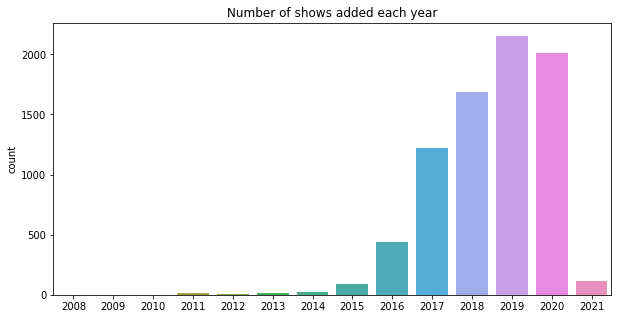

In [ ]:
# Number of shows added over the years
plt.figure(figsize = (10,5))
sns.countplot(df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')

i. in this count plot we found Number of shows added on each different years.

ii. 2019 are the highest number of shows added on and 2020 are the second highest number of shows added on and 2018 are the third highest number of shows added on.

# **Chart-12**

# **Biovariate Analysis**

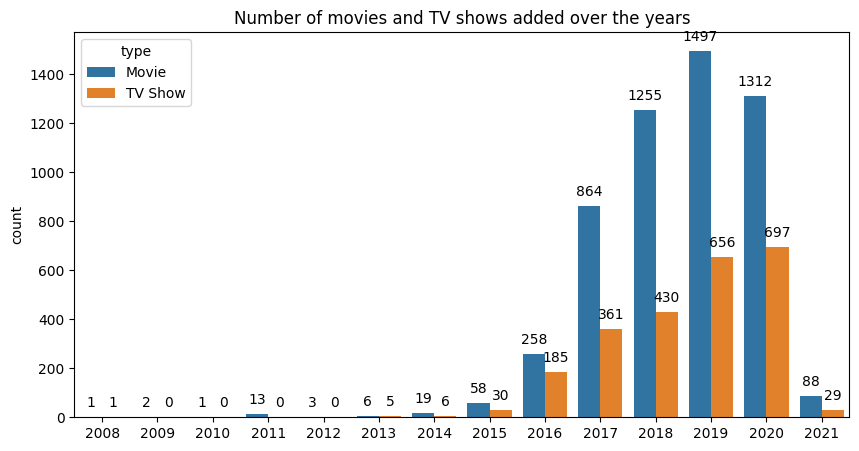

In [ ]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

i. A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects. Such a plot permits you to see at a glance the degree and pattern of relation between the two variables.

ii. In this graph we found that Number of movies and TV shows added over the years.2019 are the 1497 movies and 656 TV shows are there. 2020 year 1312 movies and 697 TV shows are there and 2018 year 1255 movies and 430 TV shows are there.




##### ***1. Why did you pick the specific chart?***

The resulting count plot will have bars representing the number of movies and TV shows added in each year, and it provides a visual representation of the growth and distribution of Netflix's content library over the years.

#####***2. What is/are the insight(s) found from the chart?***


plt.figure(figsize=(10, 5)): This line sets the size of the figure that will be created for the count plot. The figure size is 10 inches wide and 5 inches high.


p = sns.countplot(x='year_added', data=df, hue='type'): This line creates the count plot using the seaborn library.


x='year_added': This specifies that the 'year_added' column from the DataFrame 'df' will be used for the x-axis of the count plot. The 'year_added' column likely contains information about the years when shows were added to Netflix.


hue='type': This specifies that the 'type' column from the DataFrame 'df' will be used to differentiate between movies and TV shows. The 'type' column likely contains categorical data that indicates whether each entry is a movie or a TV show. The hue parameter allows us to display separate bars for movies and TV shows for each year.


plt.title('Number of movies and TV shows added over the years'): This line sets the title of the plot as "Number of movies and TV shows added over the years."


plt.xlabel(''): This line sets the x-axis label to an empty string, which means no label will be displayed for the x-axis. The x-axis already represents the years, so this is to remove any redundant labeling.


for i in p.patches: and the following lines: This code snippet adds text labels to the bars in the count plot to display the exact count of movies and TV shows added in each year. It uses a loop to iterate through each bar (patches) in the plot and adds a text annotation using the annotate function. The annotation includes the count of shows (i.get_height()) on top of each bar and is centered horizontally and slightly above the bar.



##### ***3. Will the gained insights help creating a positive business impact? ***
####***Are there any insights that lead to negative growth? Justify with specific reason.###***

YES.it will create business impact.

# **Chart-13**

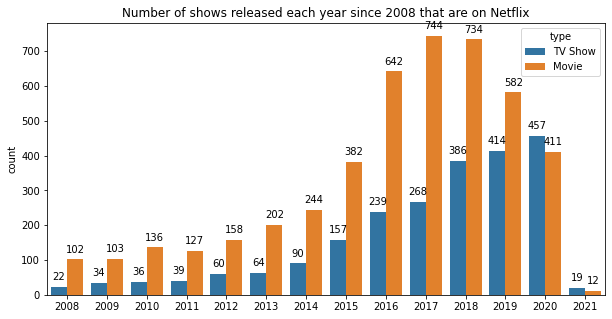

In [ ]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


i. A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects. Such a plot permits you to see at a glance the degree and pattern of relation between the two variables.

ii. In this graph we found that Number of shows released each year since 2008 that are on Netflix.see this graph Before 2019 Movies are highest number of released but 2020 and 2021 TV shows are the highest number of released.

The resulting count plot will have bars representing the number of movies and TV shows added in each year, and it provides a visual representation of the growth and distribution of Netflix's content library over the years.

for i in p.patches: and the following lines: This code snippet adds text labels to the bars in the count plot to display the exact count of movies and TV shows added in each year. It uses a loop to iterate through each bar (patches) in the plot and adds a text annotation using the annotate function. The annotation includes the count of shows (i.get_height()) on top of each bar and is centered horizontally and slightly above the bar.

# **Chart-14**

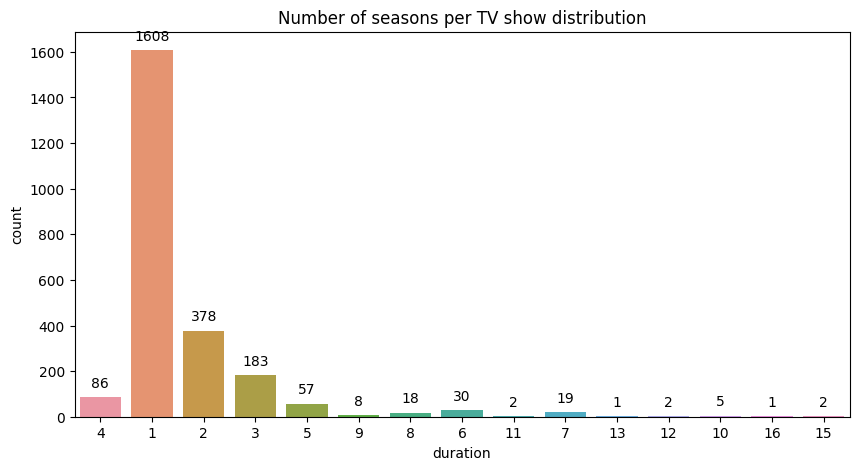

In [ ]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

i. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

ii. In this graph we found Number of per Seasons in each TV show count.first seasons are 1608 and second seasons are 378 and third seasons are 183 number of counting are there.

In [ ]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

# **Chart-15**

# **Genre separate TV_Shows**

Text(0.5, 1.0, 'Top 10 genres for movies')

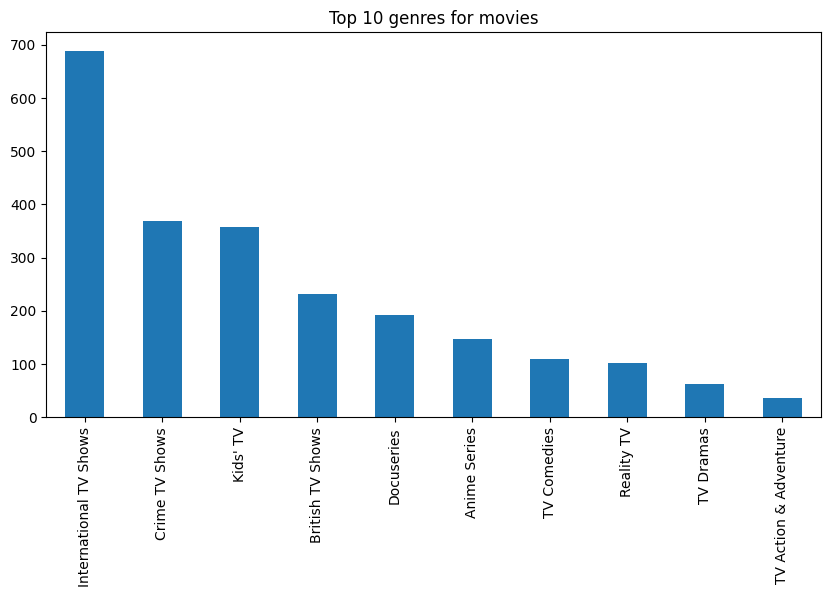

In [ ]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres for movies')

i. A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

ii. In this graph we found Top 10 genres for movies. International TV Shows are the highest number of genres type of TV shows and Crime TVShows and Kid's Shows are approximately same for generes type of TV shows.

# **Chart-16**

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

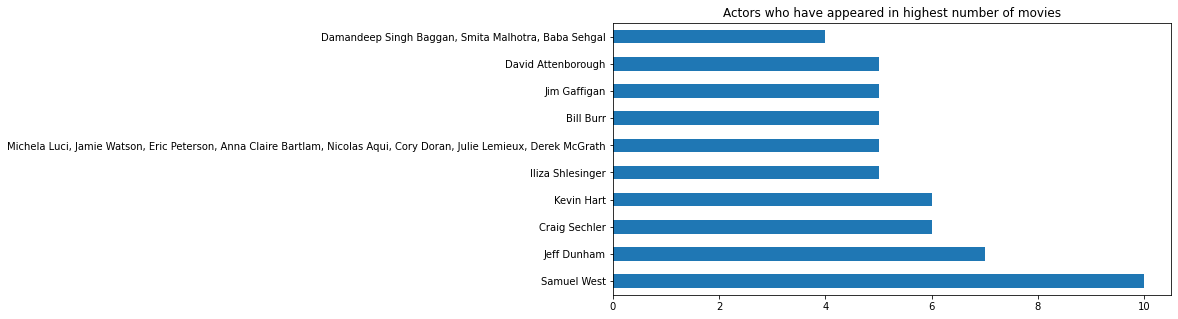

In [ ]:
# Top actors for movies
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

i. A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

ii. In this graph we found Top actors for movies. Top one actor in movies are Samuel West and second highest actor are jeff Dunham and third highest actor of movies are Craig Sechler and Kevin Hart.

# **Chart-17**

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

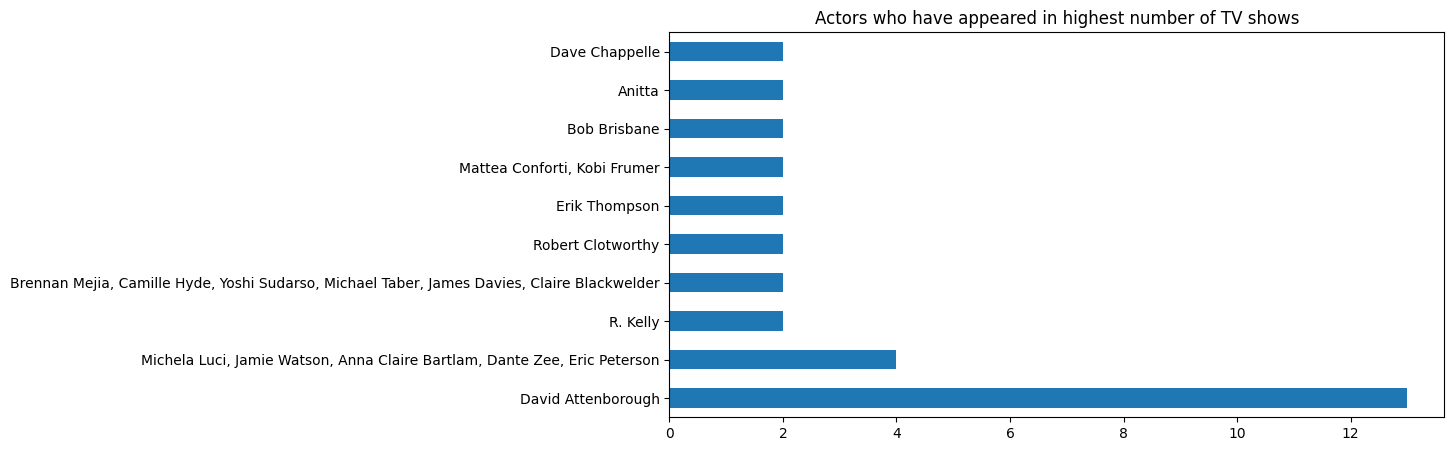

In [ ]:
# Top actors for TV shows
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

i. A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

ii. In this graph we found Actors who have appeared highest number of TV shows. Top one actor of TV Shows is David Attenborough and second highest actor in TV shows  many are there like Michela Luci,Jamie Watson,Anna Claire Bartlam,Dante Zee and Eric peterson.

# **Chart-18**

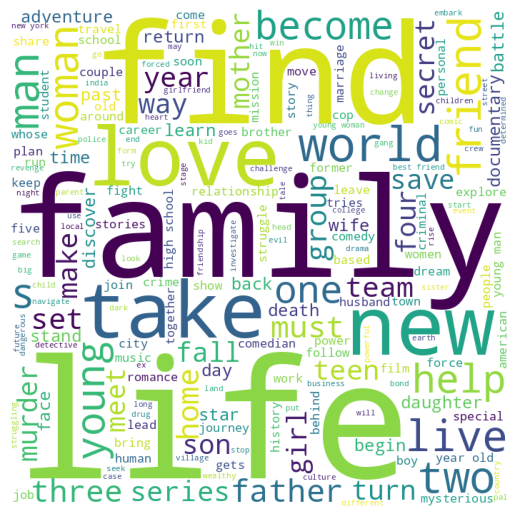

In [ ]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

i. Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s).

ii. In this graph we found life,family,love,friend,world,new,find words are many time uses.

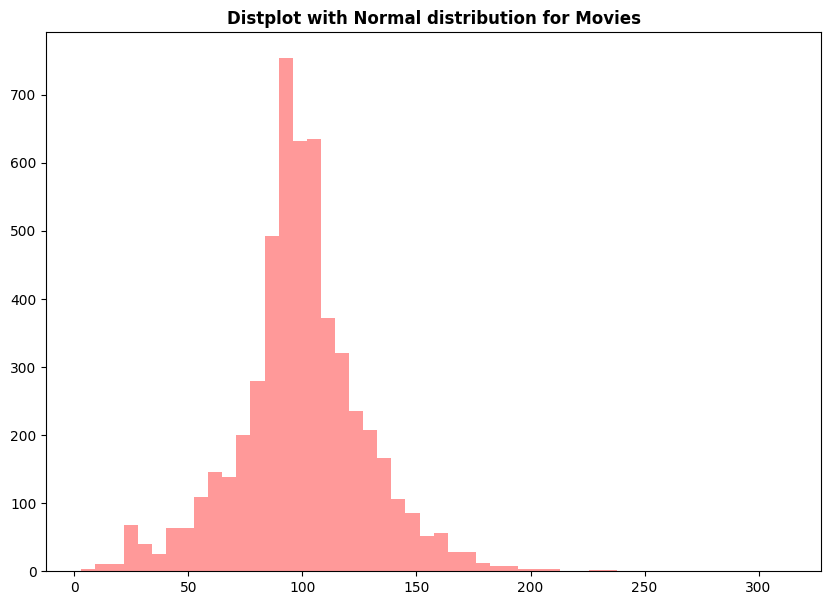

In [ ]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

The resulting histogram provides a visual representation of the distribution of movie durations in the 'movies' DataFrame. The x-axis represents the movie durations in minutes, and the y-axis shows the count of movies falling into each duration bin. The plot helps to analyze the frequency and distribution of movie durations on Netflix, providing insights into the typical duration of movies available on the platform. Since the KDE plot is disabled (kde=False), the histogram bars represent the raw count of movies without any smoothing.

.str.extract('(\d+)'): This part of the code extracts the numerical part from the 'duration' column using a regular expression. It converts the durations from strings to numerical values by extracting the digits (\d+). For example, '90 min' will be converted to 90, '120 min' to 120, etc.

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

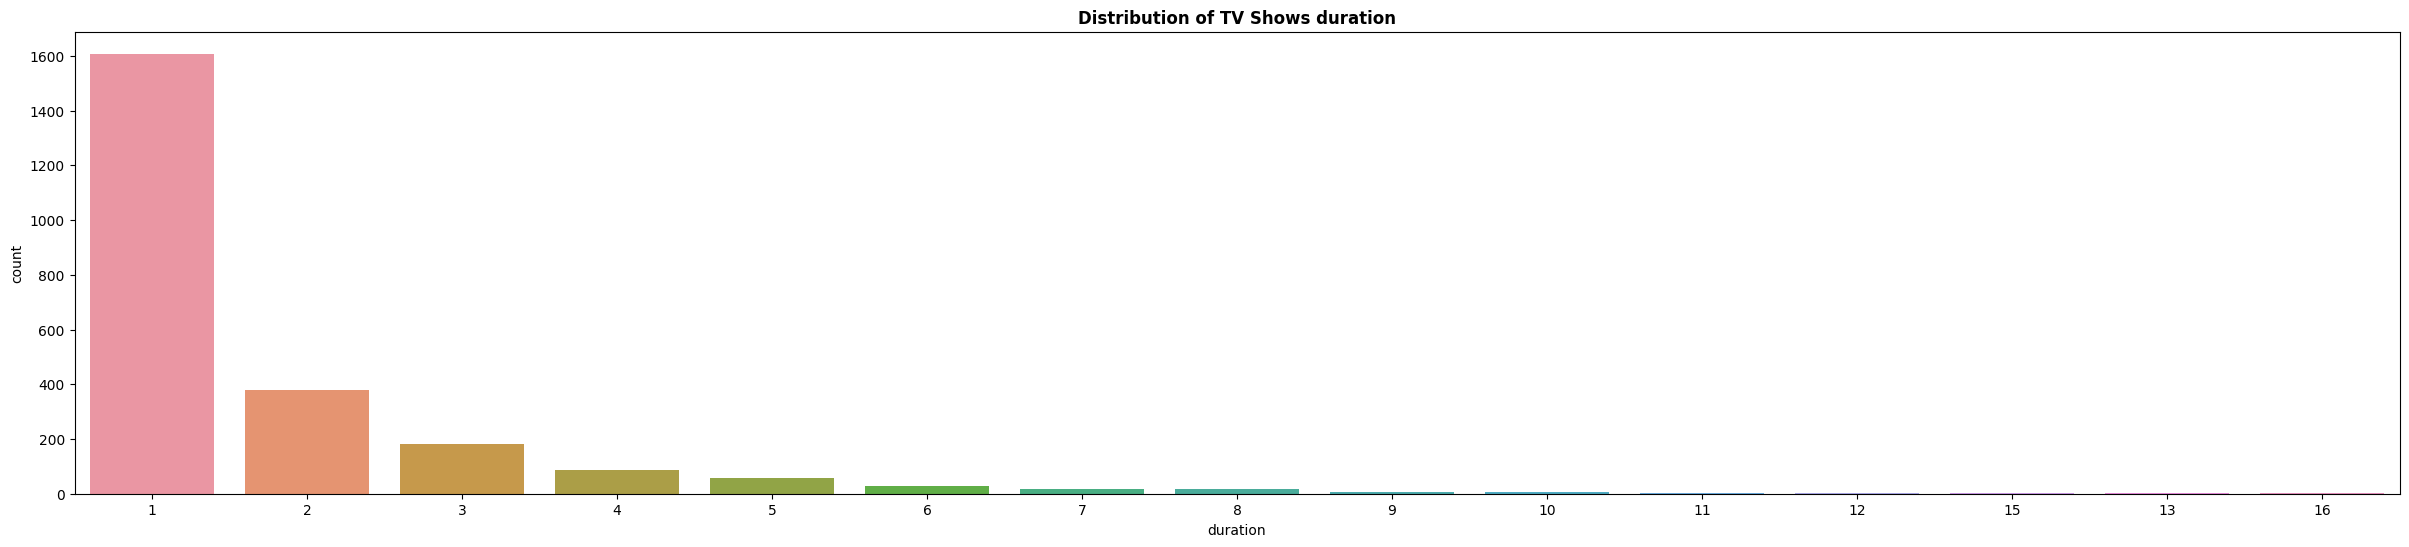

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)


The count plot will have bars for each TV show duration, and the bars' heights will represent the number of TV shows falling under each respective duration. The plot provides a visual representation of the distribution of TV shows based on their durations, which can help analyze the popularity and prevalence of different show durations on Netflix.

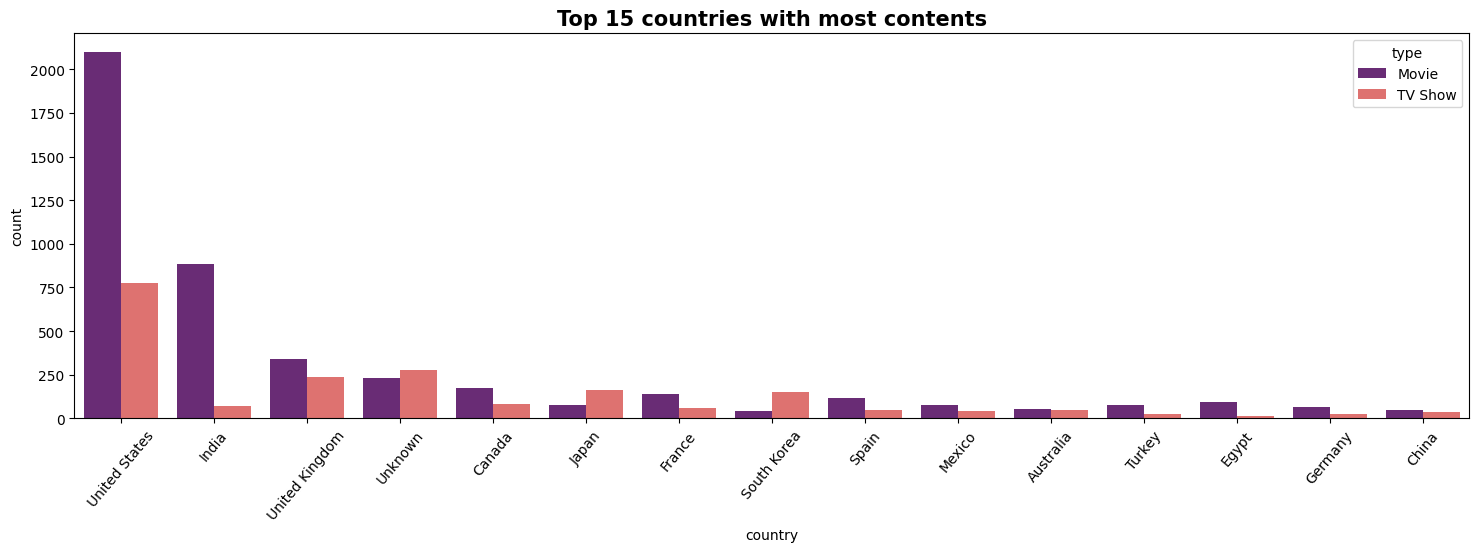

In [ ]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],palette="magma",order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

The resulting count plot will have bars representing the number of content items (movies and TV shows) available from the top 15 countries with the most content on Netflix. The plot helps to analyze the content distribution among different countries and provides insights into the countries with the highest content contribution to Netflix's library.

hue=df['type']: This specifies that the 'type' column from the DataFrame 'df' will be used to differentiate between movies and TV shows. The 'type' column likely contains categorical data that indicates whether each entry is a movie or a TV show. The hue parameter allows us to display separate bars for movies and TV shows for each country.

([<matplotlib.patches.Wedge at 0x7cd2fa193d90>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

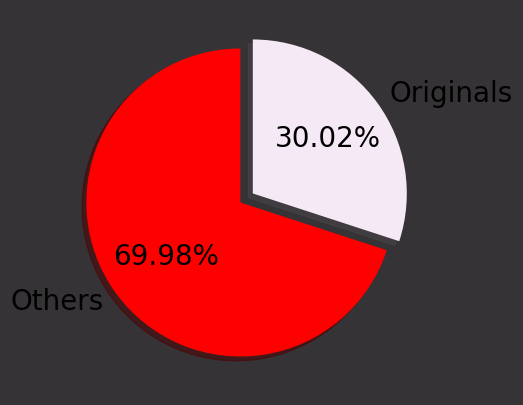

In [ ]:
movies['originals'] = np.where(movies['release_year']==movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

30% movies released on Netflix.
70% movies added on Netflix were released earlier by different mode.

The resulting pie plot will show two slices: one for 'Others' (representing non-original movies) and the other for 'Originals'. The sizes of the slices represent the percentage of original and non-original movies in the 'movies' DataFrame. The plot helps to visualize the proportion of original content among all the movies available on Netflix.

# **Data Processing**

In [ ]:
# Using the original dataset for clustering since
# it does not require handling missing values
Dataset = df.copy()

In [ ]:
Dataset.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column

Dataset['clustering'] = (Dataset['director'] + ' ' +
                                Dataset['cast'] +' ' +
                                Dataset['country'] +' ' +
                                Dataset['listed_in'] +' ' +
                                Dataset['description'])

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

# **We have successfully completed your EDA Capstone Project !!!**

# **Removing Punctuation**

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
Dataset['clustering'] = Dataset['clustering'].apply(remove_punctuation)

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters
def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
Dataset['clustering'] = remove_non_ascii(Dataset['clustering'])

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing stopwords**

In [ ]:
Dataset

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,date_added,month_added,year_added,target_ages,principal_country,count,clustering
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,2020-08-14,8,2020,Adults,Brazil,1,Unknown Joao Miguel Bianca Comparato Michel Go...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016-12-23,12,2016,Adults,Mexico,1,Jorge Michel Grau Demian Bichir Hector Bonilla...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018-12-20,12,2018,Adults,Singapore,1,Gilbert Chan Tedd Chan Stella Chung Henley Hii...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017-11-16,11,2017,Teens,United States,1,Shane Acker Elijah Wood John C Reilly Jennifer...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020-01-01,1,2020,Teens,United States,1,Robert Luketic Jim Sturgess Kevin Spacey Kate ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2005,TV-MA,99,Dramas,When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,10,2020,Adults,Sweden,1,Josef Fares Imad Creidi Antoinette Turk Elias ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,2019-03-02,3,2019,Young Adults,India,1,Mozez Singh Vicky Kaushal SarahJane Dias Raagh...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2019,TV-MA,44,Documentaries,"In this documentary, South African rapper Nast...",2020-09-25,9,2020,Adults,Unknown,1,Unknown Nasty C Unknown Documentaries In this ...
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2019,TV-PG,1,International TV Shows,Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,10,2020,Older Kids,Australia,1,Unknown Adriano Zumbo Rachel Khoo Australia In...


In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
Dataset['clustering'] = Dataset['clustering'].apply(remove_stopwords)

In [ ]:
# Select the 100 number of clusters for the dataset
Dataset['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

# **Removing  Lemmatization:**

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

The lemmatize_verbs function can be used to lemmatize a list of words, especially when dealing with text data that requires word normalization or standardization. In this case, the function specifically targets verbs and returns their base forms, which can help in simplifying and standardizing the words for further text analysis. To use this function, make sure to have the nltk library installed and import the WordNetLemmatizer class from nltk.stem.

In [ ]:
# Lemmatization
Dataset['clustering'] = lemmatize_verbs(Dataset['clustering'])

In [ ]:
# Select the 100 number of clusters for the dataset
print(Dataset['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


# **Tokenization:**

In [ ]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

tokenizer = TweetTokenizer(): This line creates a reference variable named tokenizer and assigns an instance of the TweetTokenizer class to it. The variable tokenizer now holds an object that can be used to tokenize tweets. You can use this reference variable to access the methods and functionalities of the TweetTokenizer class for tweet tokenization.


With this reference variable, you can now use the tokenizer object to tokenize tweets and perform further text analysis on tweet text data using the specific functionalities provided by the TweetTokenizer class.

In [ ]:
# Create text column based on dataset
Dataset['clustering'] = Dataset['clustering'].apply(lambda x: tokenizer.tokenize(x))

Explanation of the code:

Dataset['clustering']: This selects the 'clustering' column from the 'Dataset' DataFrame. The 'clustering' column likely contains text data that needs to be tokenized.

.apply(lambda x: tokenizer.tokenize(x)): This applies a lambda function to each element of the 'clustering' column. The lambda function takes each text (string) in the 'clustering' column and tokenizes it using the tokenizer object.


lambda x: This is a lambda function that takes an input 'x', which represents each text string in the 'clustering' column.


tokenizer.tokenize(x): This uses the tokenizer object (previously defined as the TweetTokenizer class) to tokenize the input 'x', which is the text string. The tokenizer breaks the text into individual tokens based on tweet-specific rules, such as handling hashtags, mentions, and emojis.


Dataset['clustering'] = ...: This assigns the tokenized versions of the text back to the 'clustering' column in the 'Dataset' DataFrame. The 'clustering' column now contains lists of tokens (i.e., tokenized ver
sions) for each text in the original 'clustering' column.


By applying the tokenizer to the 'clustering' column and storing the tokenized versions in a new column or replacing the original column, you can now work with tokenized text data for further analysis, such as text clustering, sentiment analysis, or topic modeling. Each row in the 'clustering' column will contain a list of tokens extracted from the original text.



In [ ]:
# Select the 100 number of Tokenization for the dataset
print(Dataset['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


# **Vectorization:**

In [ ]:
# clustering tokens saved in a variable
clustering_vectorization = Dataset['clustering']

In [ ]:
clustering_vectorization

0       [unknown, joao, miguel, bianca, comparato, mic...
1       [jorge, michel, grau, demian, bichir, hector, ...
2       [gilbert, chan, tedd, chan, stella, chung, hen...
3       [shane, acker, elijah, wood, john, c, reilly, ...
4       [robert, luketic, jim, sturgess, kevin, spacey...
                              ...                        
7782    [josef, fares, imad, creidi, antoinette, turk,...
7783    [mozez, singh, vicky, kaushal, sarahjane, dias...
7784    [unknown, nasty, c, unknown, documentaries, do...
7785    [unknown, adriano, zumbo, rachel, khoo, austra...
7786    [sam, dunn, unknown, united, kingdom, document...
Name: clustering, Length: 7777, dtype: object

In [ ]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)
x = tfidf.fit_transform(clustering_vectorization)

In [ ]:
x

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 222386 stored elements in Compressed Sparse Row format>

from sklearn.feature_extraction.text import TfidfVectorizer: This line imports the TfidfVectorizer class from the sklearn.feature_extraction.text module. TfidfVectorizer is a feature extraction tool used to convert text data into TF-IDF vectors, which represent the importance of words in a document relative to a corpus.


tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False, max_features=20000): This line creates an instance of the TfidfVectorizer class and configures its parameters.


tokenizer=tokenizer: This specifies the tokenizer to be used for tokenizing the text. Here, you are using the previously defined tokenizer reference variable (which contains an instance of TweetTokenizer) to tokenize the text.


stop_words='english': This parameter tells the vectorizer to remove common English stop words (e.g., 'the', 'and', 'is') during the vectorization process. Removing stop words can help reduce noise in the resulting TF-IDF vectors.


lowercase=False: This parameter specifies that the vectorizer should not convert all text to lowercase. Keeping the original case can be important for certain analyses.


max_features=20000: This parameter sets the maximum number of features (i.e., unique words) that will be used in the TF-IDF vectorization. It limits the vocabulary size to 20,000 words. If you have a large corpus with many unique words, this parameter can help reduce the dimensionality of the resulting TF-IDF vectors.


x = tfidf.fit_transform(clustering_vectorization): This line applies the TF-IDF vectorization to the text data stored in the clustering_vectorization variable. The fit_transform method calculates the TF-IDF values for each word in the text and transforms the text into a sparse matrix 'x'. The resulting 'x' matrix will represent the TF-IDF vectors for the input text data.


After executing this code, 'x' will contain the TF-IDF representation of the text data stored in clustering_vectorization. This matrix can be used as input to various machine learning models or analyses that require numerical representations of text data.

In [ ]:

# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [ ]:
# convert X into array form for clustering
X = x.toarray()

In [ ]:
# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#**Reduceing Diemensionality using PCA**

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

Dimensionality reduction using PCA can be useful for visualizing high-dimensional data, reducing computational complexity, and improving the performance of machine learning algorithms when dealing with high-dimensional datasets. The number of dimensions in the reduced space is determined by the number of principal components you choose to retain, and this decision is often based on the explained variance or other application-specific requirements.

from sklearn.decomposition import PCA: This line imports the PCA class from the sklearn.decomposition module. PCA is a technique used for dimensionality reduction by transforming high-dimensional data into a lower-dimensional space while preserving the variance in the data.


pca = PCA(random_state=40): This line creates an instance of the PCA class. The random_state=40 parameter sets the random seed for reproducibility. By providing a specific random seed, you ensure that the same random initialization is used every time you run the PCA, leading to consistent results.


pca.fit(X): This line fits the PCA model to the data represented by matrix 'X'. The fit method calculates the principal components and the transformation matrix based on the data in 'X'. After fitting, the PCA model is ready to perform dimensionality reduction or to be used for other purposes.


After executing this code, the pca object will contain the fitted PCA model. You can use this model to perform dimensionality reduction by projecting new data onto the principal components. For example, you can use the pca.transform(new_data) method to reduce the dimensionality of new data based on the principal components learned during the fitting step.

Text(0, 0.5, 'cumulative explained variance')

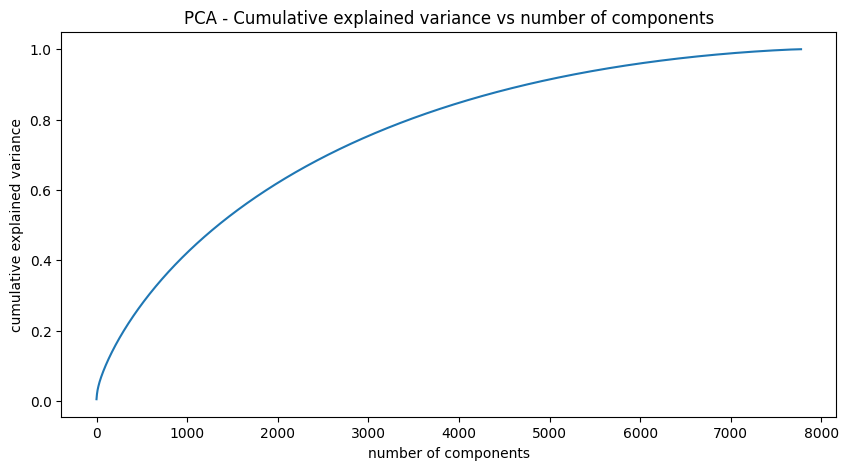

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

np.cumsum(pca.explained_variance_ratio_): This calculates the cumulative sum of the explained variance ratios for each principal component obtained from the fitted PCA model. The pca.explained_variance_ratio_ attribute contains the percentage of variance explained by each principal component, sorted in descending order. The cumulative sum of these explained variance ratios gives the cumulative explained variance.

The resulting line plot shows how the cumulative explained variance increases with the number of principal components. The plot helps in understanding how much information is retained when reducing the dimensionality of the data using PCA. As the number of components increases, the cumulative explained variance approaches 100% (or 1.0), indicating that more of the total variance in the data is captured by the principal components.



This type of plot is useful for determining the optimal number of principal components to retain for dimensionality reduction based on the amount of variance retained. The plot often displays an "elbow point," where the rate of increase in cumulative explained variance slows down significantly, suggesting that adding more components does not contribute much to the overall variance explanation. The number of components corresponding to this elbow point is often chosen as the reduced dimensionality in practice.

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7777, 7777)

# **Now start wih Unservised Machine Learning clustering algorithms**

##**1.K-Means Clustering:**

Text(0, 0.5, 'WCSS')

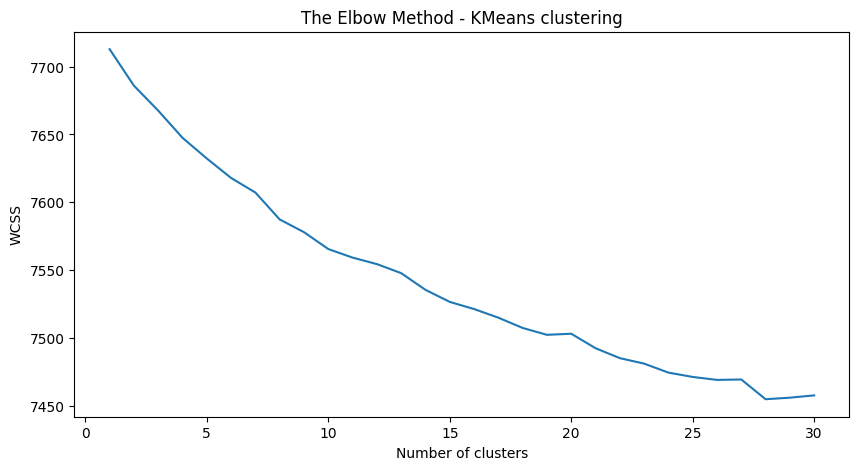

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The code you've provided is implementing the "Elbow Method" to find the optimal number of clusters (k) for KMeans clustering. The Elbow Method is a heuristic technique to determine the appropriate number of clusters by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters and looking for the "elbow point," which is the point where the rate of decrease in WCSS starts to slow down.


Here's a breakdown of the code:

wcss = []: This list will be used to store the WCSS values for different numbers of clusters.


The loop for i in range(1, 31): iterates through a range of possible cluster numbers from 1 to 30.


Inside the loop:

kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33): This initializes the KMeans clustering algorithm with the specified number of clusters i, 'k-means++' initialization method, and a fixed random seed for reproducibility.

kmeans.fit(x_pca): The KMeans algorithm is fitted to the data x_pca, which is presumably the dataset you want to perform clustering on.
wcss_iter = kmeans.inertia_: inertia_ is an attribute of the KMeans object that represents the WCSS for that particular clustering.
wcss.append(wcss_iter): The calculated WCSS for the current number of clusters is added to the wcss list.

number_clusters = range(1, 31): This creates a range of numbers from 1 to 30, representing the different numbers of clusters.


The code then plots the WCSS values against the number of clusters using plt.plot(number_clusters, wcss). The rest of the code sets labels and title to the plot for better visualization.


After running this code, you will get a plot that shows the WCSS values as the number of clusters increases. The idea is to identify the "elbow point" on the plot where the WCSS starts to decrease more slowly. This point often corresponds to the optimal number of clusters for your dataset.

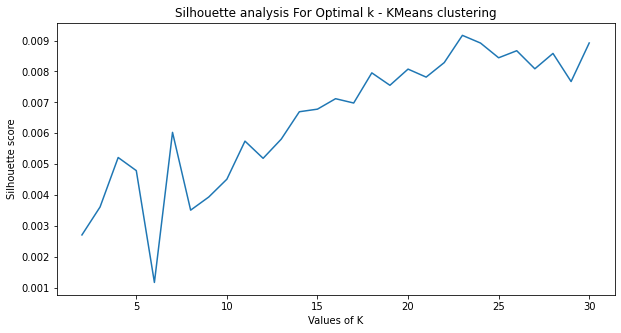

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The code you've provided is implementing the "Silhouette Analysis" to determine the optimal number of clusters (k) for KMeans clustering. The Silhouette score measures how similar an object is to its own cluster compared to other clusters. It can help identify the optimal number of clusters by finding the value of k that maximizes the Silhouette score.

Here's a breakdown of the code:


range_n_clusters = range(2, 31): This creates a range of numbers from 2 to 30, representing the different numbers of clusters you want to consider.


silhouette_avg = []: This list will be used to store the silhouette scores for different numbers of clusters.


The loop for num_clusters in range_n_clusters: iterates through the range of cluster numbers.


Inside the loop:


kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=33): Initializes the KMeans clustering algorithm with the specified number of clusters num_clusters, 'k-means++' initialization method, and a fixed random seed.

kmeans.fit(x_pca): Fits the KMeans algorithm to the data x_pca.
cluster_labels = kmeans.labels_: Retrieves the cluster labels assigned by the KMeans algorithm.

silhouette_avg.append(silhouette_score(x_pca, cluster_labels)): Calculates the silhouette score for the current clustering and adds it to the silhouette_avg list.

plt.figure(figsize=(10,5)): Creates a new figure for the plot with a specified size.

plt.plot(range_n_clusters, silhouette_avg): Plots the silhouette scores against the number of clusters.

The code sets labels and a title for the plot to make it more informative.

plt.show(): Displays the plot.

Running this code will generate a plot showing the silhouette scores for different numbers of clusters. The optimal number of clusters is often indicated by the highest silhouette score, as it suggests that the objects within the same cluster are more similar to each other than to objects in other clusters.

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)

KMeans(n_clusters=6, random_state=40)

n_clusters=6: Specifies the number of clusters you want the algorithm to create. In this case, you've set it to 6 clusters.

init='k-means++': Specifies the method for initializing the cluster centroids. 'k-means++' is a smart initialization method that aims to distribute the initial centroids in a way that enhances convergence.

random_state=40: Sets the random seed for reproducibility. This ensures that if you run the code multiple times, you'll get the same results as long as you keep this random seed consistent.

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['kmeans_cluster'] = kmeans.labels_

Dataset: This presumably represents your dataset, which is a DataFrame.

'kmeans_cluster': This is the name of the new column you're adding to the DataFrame. It will store the cluster labels assigned by the KMeans algorithm.

kmeans.labels_: This attribute of the KMeans object contains the cluster labels assigned to each data point in the same order as they were presented to the fit() method. By assigning these labels to the 'kmeans_cluster' column, you're effectively associating each data point in your dataset with its respective cluster.

After running this code, your dataset will have a new column 'kmeans_cluster' that contains the cluster labels assigned by the KMeans algorithm. This column can be used for further analysis, visualization, or any other tasks you have in mind to explore and understand the cluster assignments.

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6408.909689852695, 0.006282752077933019)


kmeans.inertia_: This attribute of the KMeans object (kmeans) provides the sum of squared distances between each data point and its assigned cluster center. It's often referred to as the distortion and is a measure of how tightly the data points are clustered around their respective centroids.


silhouette_score(x_pca, kmeans.labels_): This function calculates the silhouette score for your data given the cluster labels assigned by KMeans. The silhouette score measures the quality of clustering by comparing the average distance between data points in the same cluster with the average distance between data points in different clusters. Higher silhouette scores indicate better-defined clusters.

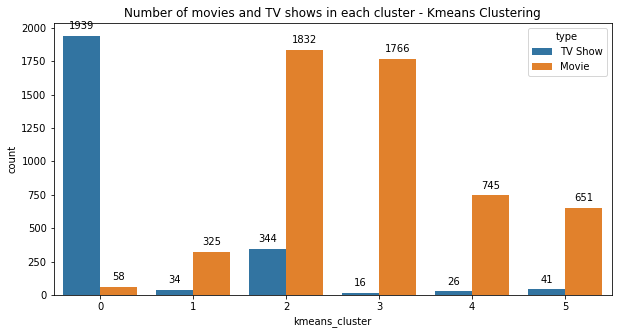

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=Dataset, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in Dataset[Dataset['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)



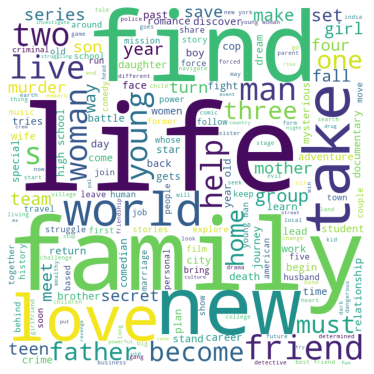

In [ ]:
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##**2.Hierarchical clustering:**

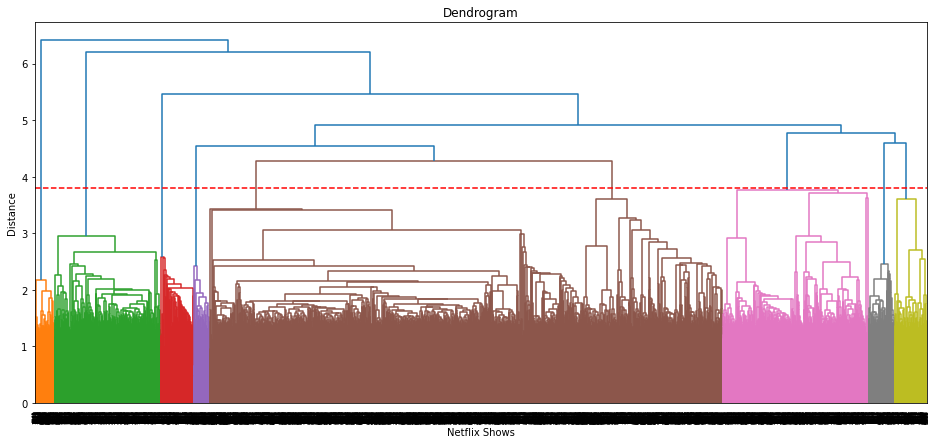

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(16, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

shc.linkage(x_pca, method='ward'): This function computes the linkage matrix using the Ward's linkage method, which is a method for hierarchical clustering. The linkage matrix contains information about the distances between data points and clusters.


shc.dendrogram(...): This function generates the dendrogram plot based on the linkage matrix. The variable dend stores the information about the dendrogram, which can be used for further analysis or customization.

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

array([ 0,  0,  1, ...,  4,  4, 10])

AgglomerativeClustering: This is the class from scikit-learn that implements the Agglomerative Clustering algorithm for hierarchical clustering.

n_clusters=12: You're specifying that you want the algorithm to form 12 clusters. This is the number of clusters you've chosen for your hierarchical clustering.

affinity='euclidean': The affinity parameter determines the distance metric to be used in the hierarchical clustering. 'euclidean' means that the Euclidean distance will be used to measure the dissimilarity between data points.

linkage='ward': The linkage parameter specifies the linkage criterion to be used when merging clusters. 'ward' indicates that Ward's linkage method will be used. Ward's linkage aims to minimize the variance when merging clusters, creating compact and balanced clusters

fit_predict(x_pca): This method fits the hierarchical clustering model to the PCA-transformed data x_pca and returns the cluster assignments for each data point. It performs the following steps:

It calculates the distances between data points using the specified affinity (Euclidean distance in this case).

It performs hierarchical clustering by merging clusters based on the linkage criterion.

It assigns each data point to a cluster and returns an array of cluster labels.

In [ ]:
# Adding a kmeans cluster number attribute
Dataset['hierarchical_cluster'] = hierarchical.labels_

Dataset: This is assumed to be your dataset, which is likely a DataFrame containing your data.


'hierarchical_cluster': This is the name you're giving to the new column that you're adding to your DataFrame. This column will store the cluster labels assigned by the hierarchical clustering algorithm.


hierarchical.labels_: This is an attribute of the AgglomerativeClustering object (hierarchical) that contains the cluster labels assigned to each data point in the same order as they were presented to the fit_predict() method. By using this attribute, you're associating each data point in your dataset with its respective hierarchical cluster

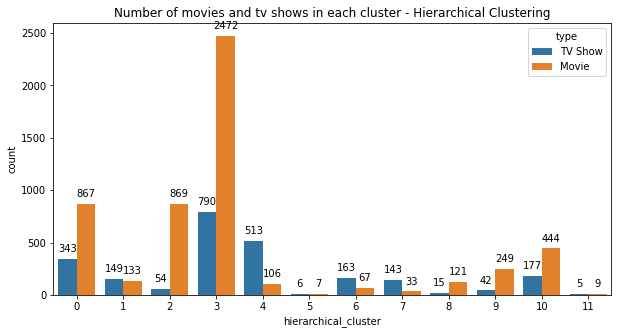

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=Dataset, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in Dataset[Dataset['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return hierarchical_worldcloud

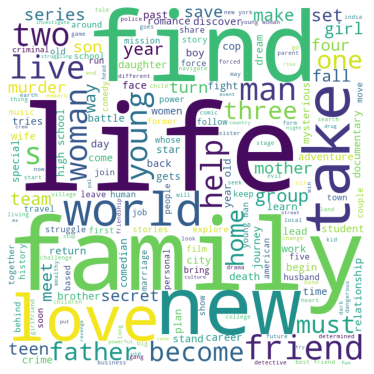

In [ ]:
  # plot the WordCloud image
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# **Using Content based recommender system**

In [ ]:
# Changing the index of the df from show id to show title
Dataset['show_id'] = Dataset.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

Dataset['clustering'] = Dataset['clustering'].apply(lambda x: convert(x))

This code defines a function named convert that takes a list (lst) as its argument. Inside the function:

' '.join(lst) is used to join the elements in the input list (lst) using a space as the separator. This effectively converts the list of tokens into a single string.

Dataset['clustering']: This part selects the column named 'clustering' from your dataset. This column likely contains lists of tokens.

.apply(lambda x: convert(x)): The .apply() method is used to apply a function to each element in the selected column. Here, a lambda function is defined: lambda x: convert(x). This lambda function takes each list of tokens (x) and applies the previously defined convert function to it.

So, when you run this code:

The convert function takes a list of tokens and returns a single string containing those tokens separated by spaces.

The .apply() method applies the lambda function to each element (list of tokens) in the 'clustering' column of your dataset.

As a result, the content of the 'clustering' column is transformed from lists of tokens into strings, where the tokens are now space-separated within each string.

This kind of transformation is often useful when you want to work with text data in a more unified format, such as when preparing data for text analysis, feature extraction, or certain types of machine learning algorithms that require input in string forma

In [ ]:
# setting title of movies/Tv shows as index
Dataset.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(Dataset['clustering'])

fit_transform(Dataset['clustering']): This method of the CountVectorizer class is used to fit the vectorizer to the text data and transform it into a matrix of token counts. It takes a sequence of strings as input, which you're providing from the 'clustering' column of your dataset.

The CountVectorizer is fit to the text data in the 'clustering' column. It learns the vocabulary (all unique words or tokens) from the text.

The fit_transform method then transforms the text data into a matrix where each row represents a document, and each column represents a word in the vocabulary. The cell values indicate the count of each word in each document.

converted_matrix will be a sparse matrix containing the token counts.

This converted_matrix can be used as input for various machine learning algorithms, such as clustering, classification, or topic modeling. It represents your text data in a numerical format that algorithms can work with, by treating each document as a set of features representing the presence or absence of words.

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

cosine_similarity: This is the variable where you'll store the calculated cosine similarity matrix.

cosine_similarity(converted_matrix): This calculates the cosine similarity between all pairs of documents represented by the rows of the converted_matrix. The converted_matrix is the matrix of token counts obtained from your text data using the CountVectorizer.

After running this code:

The cosine_similarity variable will hold a matrix where each cell (i, j) represents the cosine similarity between the documents represented by the rows i and j of the converted_matrix.

The values in this matrix range between -1 (completely dissimilar) and 1 (completely similar). A higher value indicates a higher degree of similarity between the corresponding documents.

This cosine similarity matrix can be used for various tasks, such as document clustering, content-based recommendation systems, or finding similar documents based on their content. It provides a measure of how closely documents are related in terms of their textual content.

In [ ]:
# Dataset Rows & Columns count
cosine_similarity.shape

(7777, 7777)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(Dataset.index)

def Dataset_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(Dataset.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
Dataset_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'Illang: The Wolf Brigade',
 'Extracurricular',
 'The Lies Within',
 'Reply 1994',
 'Private Lives']

In [ ]:
# Recommendations for 'Peaky Blinders'
Dataset_10('Peaky Blinders')

If you liked 'Peaky Blinders', you may also enjoy:



['Rebellion',
 'The Blue Planet: A Natural History of the Oceans',
 'Mega Food',
 'I AM A KILLER: RELEASED',
 'Botched Up Bodies',
 'The Hunt',
 'The Murder Detectives',
 'Inside The Freemasons',
 'Happy Valley',
 'Greatest Events of WWII in Colour']

In [ ]:
# Recommendations for 'Stranger Things'
Dataset_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Tread',
 'Prank Encounters',
 'Zombie Dumb',
 'Kiss Me First',
 'Henry Danger',
 'Drug Lords',
 'Haunted',
 'Living Undocumented',
 'Million Dollar Beach House']

#**Conclusion**

1.In this project, we worked on a text clustering problem where in we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.


2.The dataset contained about 7787 records, and 12 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).


3.It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

4.Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results.


5.It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.


6.Through TFIDF Vectorization, we created a total of 20000 attributes.
We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.


7.Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.


8.A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.